In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [12]:
# This segment will take the corpora for each text blob and 
# get rid of any words that are unrelated to the text.

# For example, sometimes 'No preview available for this pa'
# can show up, due to that being on the top of the page.

# Going through an initial loop to find these segments
# and get rid of them is crucial before any more preprocessing.

# Once this is accounted for, we will simply add the rest of 
# the words to a string, which will be used for futher
# preprocessing.

from textblob import TextBlob
import re 

chosen_word = 'racism'
line = list()
counter = 0
g=""
for i in range(decade_count):
    with open(f"result{i}.txt", "r") as f:        # Opening the test file with the intention to read
            texts= f.readlines()  
        
            for text in texts:
                if 'No preview available for this pa' not in text and  (text.isspace()== False) and text!="" and "couldn't make an image for this result. Click to view the whole p" not in text:
                    textBlb = TextBlob(text)            # Making our first textblob
                    textCorrected = textBlb.correct()   # Correcting the text
                    t=textCorrected.split('\n')
                    g+=str(t)
        
  
print(g)

['viii PREFACE.', '']['section of manufactures, is that of Dam Smith. And in th', '']['case it is not a simple dictum, supported by reason or a', '']['—it stands on the immovable basis of covent reason.', '']['“« Whatever tends to diminish in any country trite of ar', '']['is and manufacturers, tends to diminish the home market,', '']['“most important of all markets for the rude Produce of the land', '']['“and thereby still further to discourage agriculture.”', '']['Were is a plain simple maxim, of which the common', '']['man in the country is capable of judging—and which along', '']['would be sufficient to decide this question without appeal.', '']['The whole course of our policy, from the commencement', '']['of our government to the present hour, has been in direct', '']['hostility with this maxim. Its tendency has been to diminish', '']['the number of manufacturers and artisans. Until the wa', '']['suspended our intercourse with Great Britain, the extravagant', '']['importation, on 

In [13]:
# All of the relevant libraries here.

from nltk.stem import SnowballStemmer
from sklearn.feature_extraction import text
import networkx as nx
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import nltk

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Camille/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
from textblob import Word
from nltk.corpus import wordnet
from PyDictionary import PyDictionary
from hunspell import Hunspell

dictionary=PyDictionary()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)


# We will use these functions for text preprocessing.

# This function will stem all of the words.
# It uses the Library Hunspell that will check to 
# see if the word can be stemmed.

# If it can, it will return the stemmed word.
# Else, it will just return back the word.

def stemmed(corpus):
    h = Hunspell()
    n=h.stem(corpus)
    if len(n)>1:
            return n[1]
    if (len(n)>0):
        return n[0]
    else:
        return corpus


# This function will remove all symbols from the text.

def remove_symbols(corpus):
        corpus = re.sub(r'\W+', ' ',corpus)
        corpus = re.sub(" \d+", " ", corpus)
        corpus = re.sub(' s ', ' ',corpus)
        corpus = re.sub(' ve ', ' ',corpus)
        corpus = re.sub(' m ', ' ',corpus)
        corpus = re.sub(' t ', ' ',corpus)
        if " " in corpus:
            return corpus.split(" ")[0]
        return corpus
    
    
# This function will check if the given word can be
# found in the dictionary.

# If it cannot, it will get rid of the word.

def ifValid(corpus):
    h = Hunspell()
    print(h.spell(corpus))
    if h.spell(corpus) and len(corpus)>1:
        return corpus
    else if (h.spell(corpus.lower) and len(corpus)>1):
        return corpus
    else:
        return ""
        
        
# If a word has a (minor) typo,
# this function will correct the word.

def correct(corpus):
    if (dictionary.meaning(corpus)) is None:
        for i in range(len(corpus)):
            word = Word(corpus[i:])
            spelling = (word.spellcheck()[0][0])
            if (spelling != corpus[i:]):
                return spelling
    else:
        return corpus

In [1]:
# This segment will go through and process each word from the 
# above string with all of the aforementioned functions.

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('words')
from nltk.tokenize import word_tokenize
import texthero as hero
from gensim.parsing.preprocessing import remove_stopwords
from collections import defaultdict

stop_words = set(stopwords.words('english'))
h=""

for i in range(len(g.split(" "))):
    
    u=remove_symbols(g.split(" ")[i])
    l=remove_stopwords(y)
    sample = stemmed(l)
    sample2 = TextBlob(sample) 
    valid = ifValid(str(sample2))
    h+=str(valid).lower()+" "



KeyboardInterrupt: 

In [56]:
# Here we will create the edges.

# In our example, we chose to scrape books that
# had the word ethnicity, so now with the string,
# we will go through and find the words that are
# close to our chosen word.


# We will be using an adjacency list that will contain
# all of the words with their respective weights. The
# key will be our chosen word, and any other words will 
# be values.

# We will assign different weights based off of how close
# the word is to our chosen word; If it is one word away,
# we will give it a weight of 5, if it is two words away, a 
# weight of 4, etc. 

# We will be assigning weights to words both before and after the word in this way.

# If the word is found again to be associated to our chosen 
# word in a different part of the text, we will simply increment
# the edge weight by the distance of the word to our chosen word.

adj_list= defaultdict(lambda: defaultdict())

chosen_word = "ethnicity"  

# Create edges that are going backward.

for i in range(len(h.split())-1):
    
    if (h.split()[i] == chosen_word):
        if (i>0):
            word1=h.split()[i+1]
            
        word2=h.split()[i]
        word3=h.split()[i-1]
        adj_list[word2][word1] = 0  
        adj_list[word2][word3] = 0   

   
for i in range(len(h.split())-1):

    if h.split()[i] == chosen_word:
        
        word2=h.split()[i]

        if (i>0):
        
            word1=h.split()[i-1]

        word3=h.split()[i+1]

        if (adj_list[word2][word1] < 1):
            adj_list[word2][word1]=5
        else:

            adj_list[word2][word1]+=5
            
        if (adj_list[word2][word3] < 1):
            adj_list[word2][word3]=5
        else:

            adj_list[word2][word3]+=5

for i in range(len(h.split())-2):
    
    if (h.split()[i] == chosen_word):
        if (i>1):
            word1=h.split()[i+2]

        word2=h.split()[i]
        word3=h.split()[i-2]
        
        adj_list[word2][word1] = 0  
        adj_list[word2][word3] = 0   
        
for i in range(len(h.split())-2):
    if h.split()[i] == chosen_word:
        
        word2=h.split()[i]
        word1=h.split()[i+2]
        
        if (i>1):
            word3=h.split()[i-2]
            
        if (adj_list[word2][word1] < 1):
            adj_list[word2][word1]=4
        else:
    
            adj_list[word2][word1]+=4
            
        if (adj_list[word2][word3] < 1):
            adj_list[word2][word3]=4
        else:

            adj_list[word2][word3]+=4
        
        
for i in range(len(h.split())-3):
    
    if (h.split()[i] == chosen_word):
        if (i>3):
            word1=h.split()[i+3]

        word2=h.split()[i]
        word3=h.split()[i-3]
        
        adj_list[word2][word1] = 0  
        adj_list[word2][word3] = 0         

for i in range(len(h.split())-3):
    if h.split()[i] == chosen_word:
        word2=h.split()[i]
        word1=h.split()[i+3]
        
        if (i>2):
            word3 = h.split()[i-3]
            
        if (adj_list[word2][word1] < 1):
            adj_list[word2][word1]=3
        else:

            adj_list[word2][word1]+=3
            
        if (adj_list[word2][word3] < 1):
            adj_list[word2][word3]=3
        else:

            adj_list[word2][word3]+=3
 
for i in range(len(h.split())-4):
    
    if (h.split()[i] == chosen_word):
        if (i>4):
            word1=h.split()[i+4]

        word2=h.split()[i]
        word3=h.split()[i-4]
        
        adj_list[word2][word1] = 0  
        adj_list[word2][word3] = 0   

for i in range(len(h.split())-4):
    
    if h.split()[i] == chosen_word:
        word2=h.split()[i]
        word1=h.split()[i+4]
        
        if (i>3):
            word3 = h.split()[i-4]
        
        if (adj_list[word2][word1] < 1):
            adj_list[word2][word1]=2
        else:

            adj_list[word2][word1]+=2  
            
        if (adj_list[word2][word3] < 1):
            adj_list[word2][word3]=2
        else:

            adj_list[word2][word3]+=2

for i in range(len(h.split())-5):
    
    if (h.split()[i] == chosen_word):
        if (i>5):
            word1=h.split()[i+5]

        word2=h.split()[i]
        word3=h.split()[i-5]
        
        adj_list[word2][word1] = 0  
        adj_list[word2][word3] = 0 
        
        
        
for i in range(len(h.split())-5):
    if h.split()[i] == chosen_word:
        word2=h.split()[i]
        word1=h.split()[i+5]
        
        if (i>5):
            word3 = h.split()[i-5]
        
        if (adj_list[word2][word1] < 1):
            adj_list[word2][word1]=(1)
        else:

            adj_list[word2][word1]+=1   
        
        if (adj_list[word2][word3] < 1):
            adj_list[word2][word3]=1
        else:

            adj_list[word2][word3]+=1

    
    
    

In [93]:
# The dictionary will then looking something like this: 
print(adj_list)

defaultdict(<function <lambda> at 0x12c25bdc0>, {'ethnicity': defaultdict(None, {'personal': 15, 'territory': 6, 'problem': 5, 'formant': 5, 'separate': 10, 'area': 10, 'assumption': 10, 'irrespective': 10, 'race': 3, 'local': 10, 'new': 16, 'take': 9, 'section': 5, 'vocation': 5, 'simply': 5, 'different': 8, 'met': 2, 'smelt': 15, 'man': 15, 'scribe': 20, 'say': 15, 'dimension': 15, 'call': 9, 'field': 6, 'history': 2, 'neglect': 2, 'crease': 25, 'study': 4, 'start': 10, 'deny': 10, 'country': 10, 'face': 10, 'summer': 6, 'rebirth': 10, 'economic': 5, 'role': 5, 'culture': 10, 'concept': 10, 'hang': 12, 'yield': 10, 'federal': 6, 'standard': 4, 'complaint': 6, 'non': 4, '31': 5, 'white': 2, '32': 10, 'single': 15, '17': 10, 'women': 1, 'prior': 1, 'adult': 2, 'identity': 4, 'sex': 1, 'people': 4, 'close': 4, 'group': 6, 'residential': 12, 'force': 8, 'fine': 8, 'belong': 8, 'he': 8, 'post': 8, 'characteristic': 8, 'staff': 4, 'good': 4, 'person': 4, 'examine': 12, 'entire': 12, 'fathe

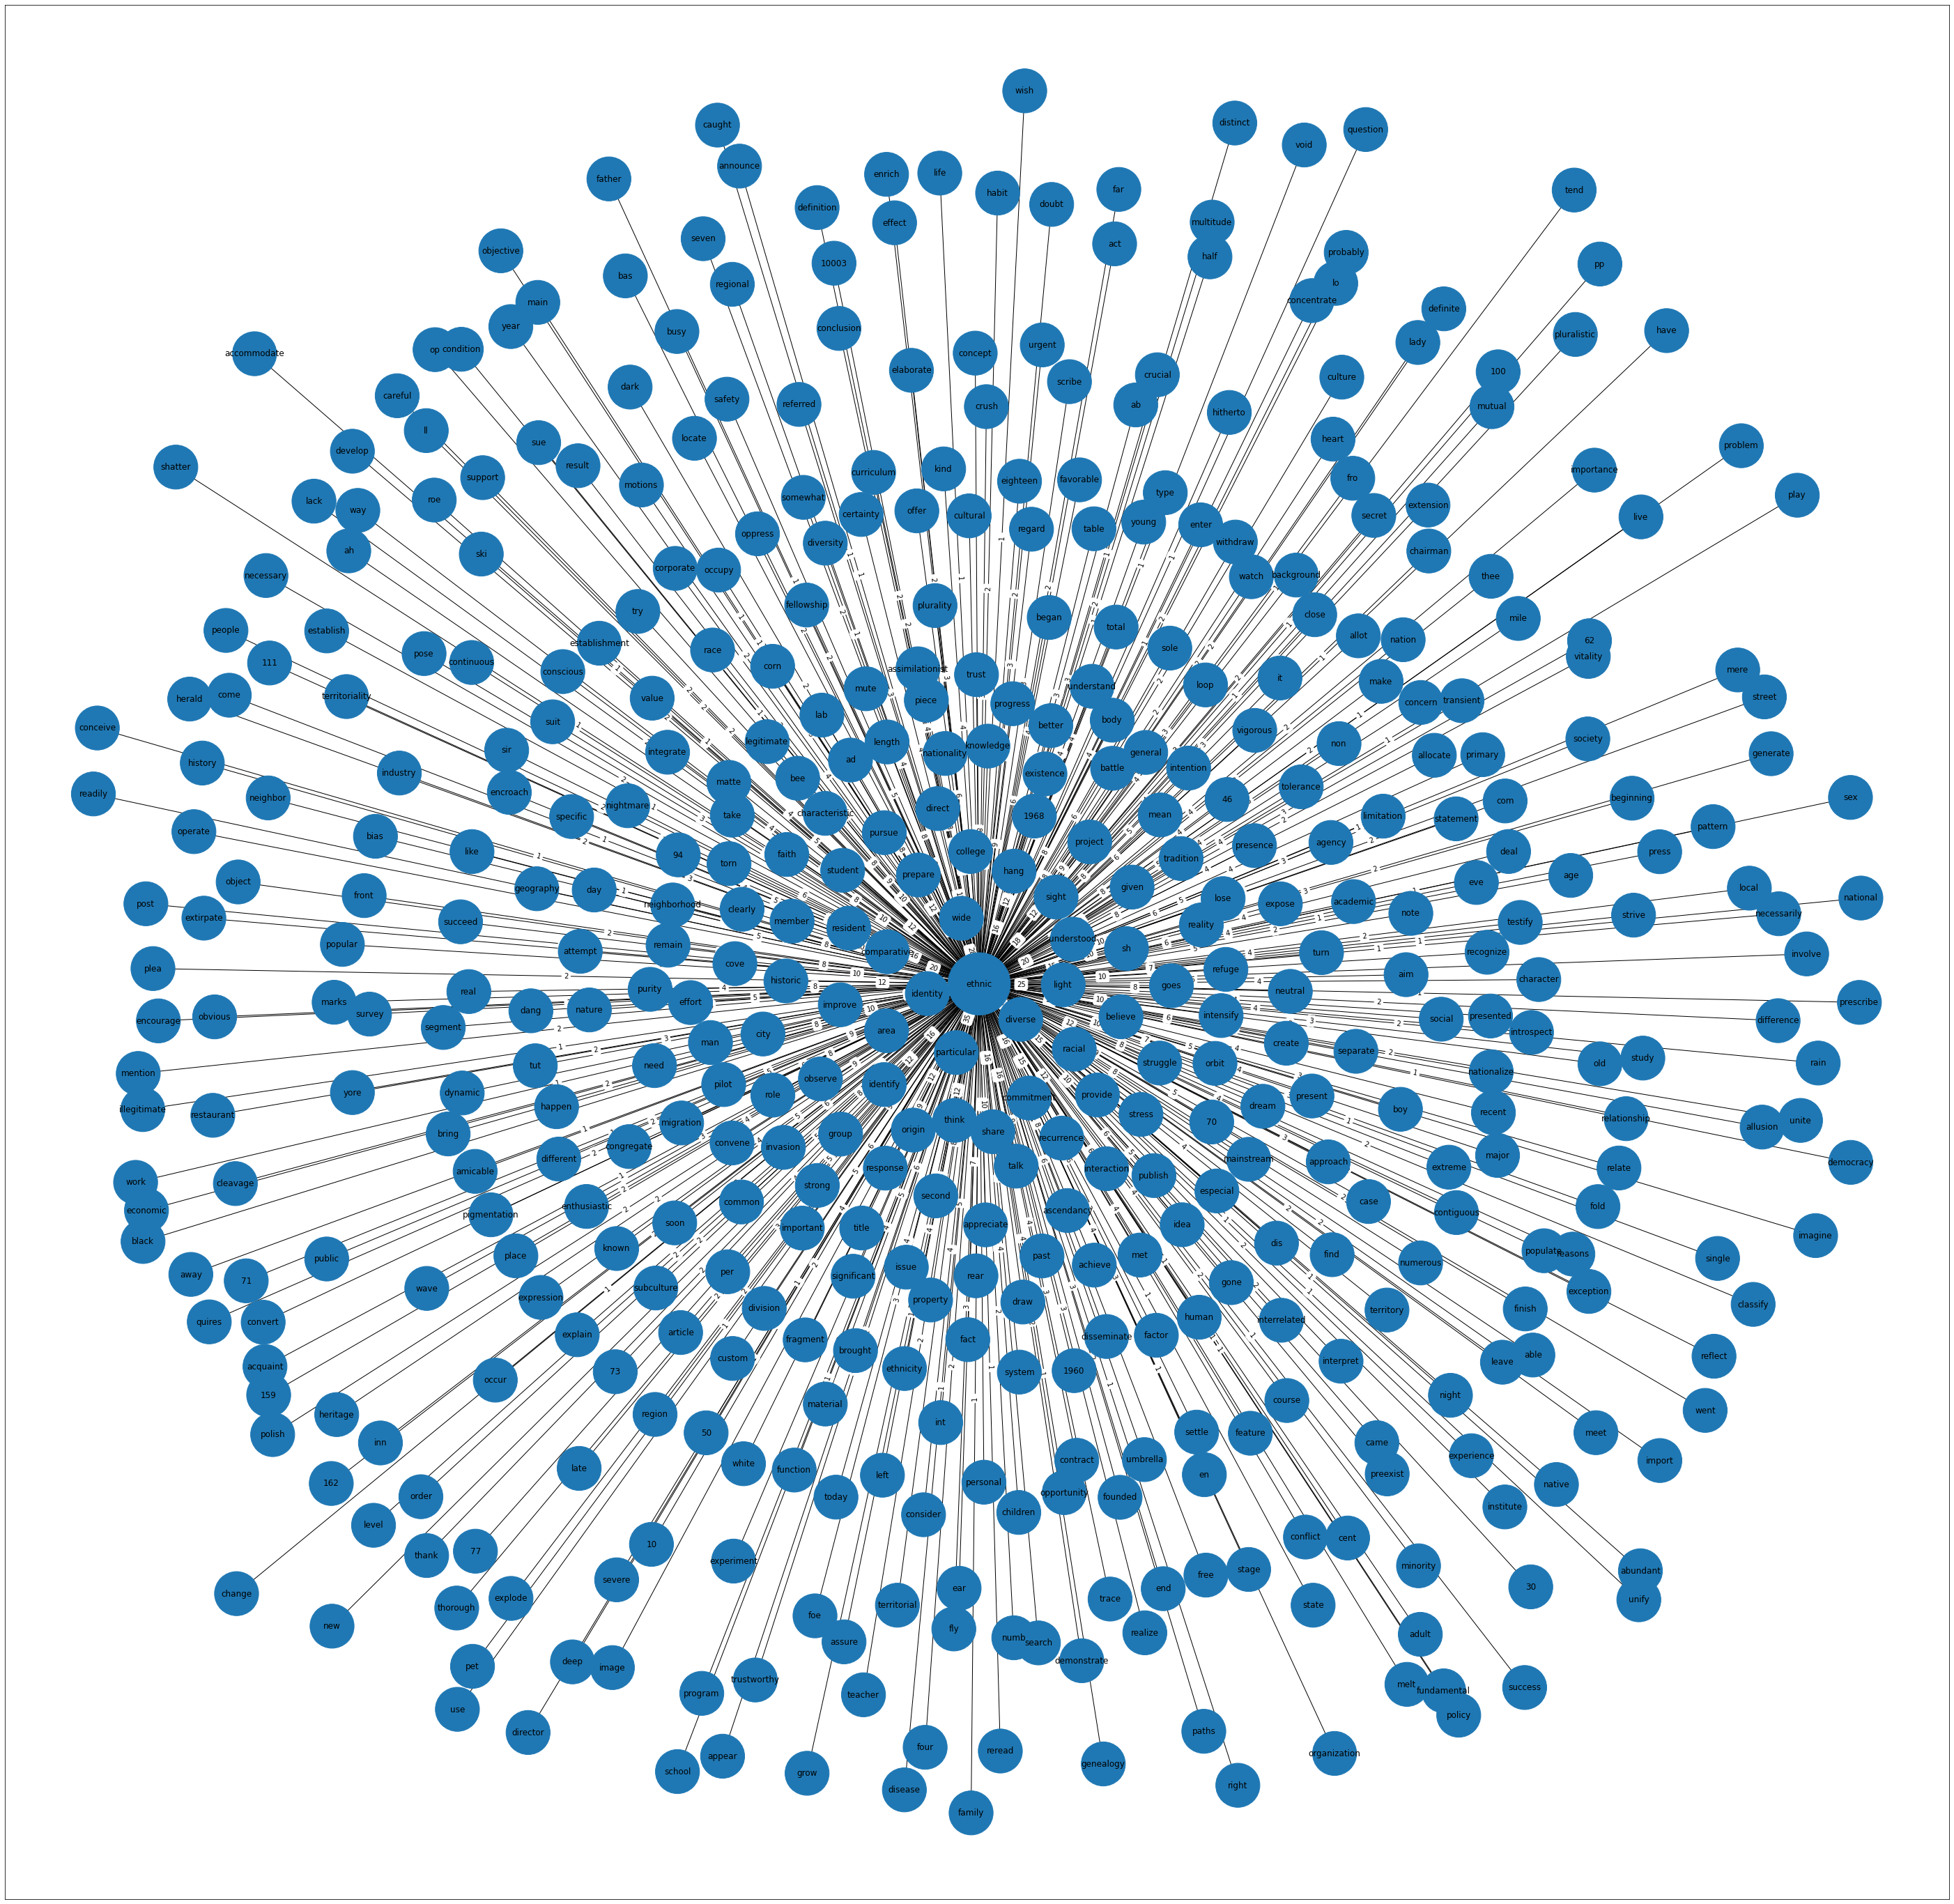

<Figure size 5040x5040 with 0 Axes>

In [98]:
# Lastly, we use this dictionary to form a graph.

# First, we make the chosen word the biggest node,
# and create a nodes list and size list that we will
# use to create all the nodes for other words. We will
# also have their size set to be considerably smaller than
# the node of our chosen word.

# Viewers can zoom in and see all associations to the chosen word.

import networkx as nx
import matplotlib.pyplot as plt
import nx_altair as nxa

graph = nx.Graph()

size=list()
nodes_list=list()
pos_list=list()
counter=0

chosen_word = 'ethnic'
size.append(8000)
nodes_list.append(chosen_word)

for i in range(len(list(adj_list[chosen_word].values()))):

    word2 = (list(adj_list[chosen_word].keys())[i])
    
    nodes_list.append(word2)
    size.append(4000)

 
for i in range(len(list(adj_list[chosen_word].values()))):
    word2 = (list(adj_list[chosen_word].keys())[i])
    val = (list(adj_list[chosen_word].values())[i])
    
    edge = graph.add_edge(chosen_word,word2,weight=val)

labels = nx.get_edge_attributes(graph,'weight')    
   
pos=nx.spring_layout(graph,k=0.25, iterations=20)
plt.figure(figsize=(50,50))
nx.draw_networkx(graph,pos,node_size=size,nodelist=nodes_list)
nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)
plt.figure(figsize=(70,70))

plt.show()
